In [3]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import glob;
import cartopy.crs as ccrs
import re
from matplotlib.animation import FuncAnimation
from PIL import Image
BAD_FLAG = -1.e+34

In [4]:
files_meridonal = glob.glob("./Data/Meridonal/*.txt")
files_zonal = glob.glob("./Data/Zonal/*.txt")
df_list_M = []
df_list_Z = []
print(files_meridonal)
print(files_zonal)

['./Data/Meridonal/Jul31-2013M.txt', './Data/Meridonal/Jul15-2013M.txt', './Data/Meridonal/Jun10-2013M.txt', './Data/Meridonal/Aug31-2013M.txt', './Data/Meridonal/Jun30-2013M.txt', './Data/Meridonal/May30-2013M.txt']
['./Data/Zonal/Jul31-2013Z.txt', './Data/Zonal/Jul15-2013Z.txt', './Data/Zonal/Jun10-2013Z.txt', './Data/Zonal/May30-2013Z.txt', './Data/Zonal/Aug31-2013Z.txt', './Data/Zonal/Jun30-2013Z.txt']


In [5]:
def read_dataset(name):

    f = open(name)
    lines = f.readlines()
    lines = lines[7:]

    splitted_dict = {}

    for i in lines:
        i = i.strip()
        line = re.split(r'[\t\n]',i)
        if (line[-1].find("** line too long **")) or (line[-1] == "** line too long **"):
            line.pop() 
        
        temp = []
        for j in range(1, len(line)):
            # if float(line[j]) != BAD_FLAG:
            #     print("YO"+line[j])
            temp.append(float(line[j]))
            
        splitted_dict[line[0]] = temp

    rain = []
    for i in splitted_dict.keys():
        temp = []
        j = 0
        while (j<len(splitted_dict[i])):
            temp.append(splitted_dict[i][j])
            j+=1
        while (j<720):
            temp.append(BAD_FLAG)
            j+=1
        rain.append(temp)
        
    if len(lines)<360:
        for i in range(0,360-len(lines)):
            temp = [BAD_FLAG]*720
            rain.append(temp)
    
    rain = np.array(rain)
    return rain

In [6]:

for i in files_meridonal:
    df_list_M.append(read_dataset(i))

for i in files_zonal:
    df_list_Z.append(read_dataset(i))

In [7]:
# print(type(df_list_M[0]))

In [8]:
dfm = pd.read_table('./Data/Meridonal/Jul31-2013M.txt',header=6)

In [9]:
print(df_list_M[0].shape)

(360, 720)


In [10]:
longitudes = dfm.columns
latitudes = dfm[longitudes[0]]
longitudes = list(longitudes[1:])
longitudes.pop()
latitude_values = []
longitude_values =[]
for i in latitudes:
    for j in longitudes:
        if 'E' in j:
            j.replace(" ",'')
            latitude_values.append(float(j.replace('E',"")))
        else:
            j.replace(" ","")
            latitude_values.append(-1*float(j.replace('W',"")))
        if 'S' in i:
            i.replace(" ","")
            longitude_values.append(-1*float(i.replace('S',"")))
        else:
            i.replace(" ","")
            # print(i.isspace())
            longitude_values.append(float(i.replace('N',"")))
            
list_dataframes= []

for i in range(0,len(df_list_M)):
    d = pd.DataFrame({
        'latitude': latitude_values,
        'longitude': longitude_values,
        'u_speed': (df_list_Z[i].flatten()),
        'v_speed': (df_list_M[i].flatten()),
    })
    list_dataframes.append(d)


    

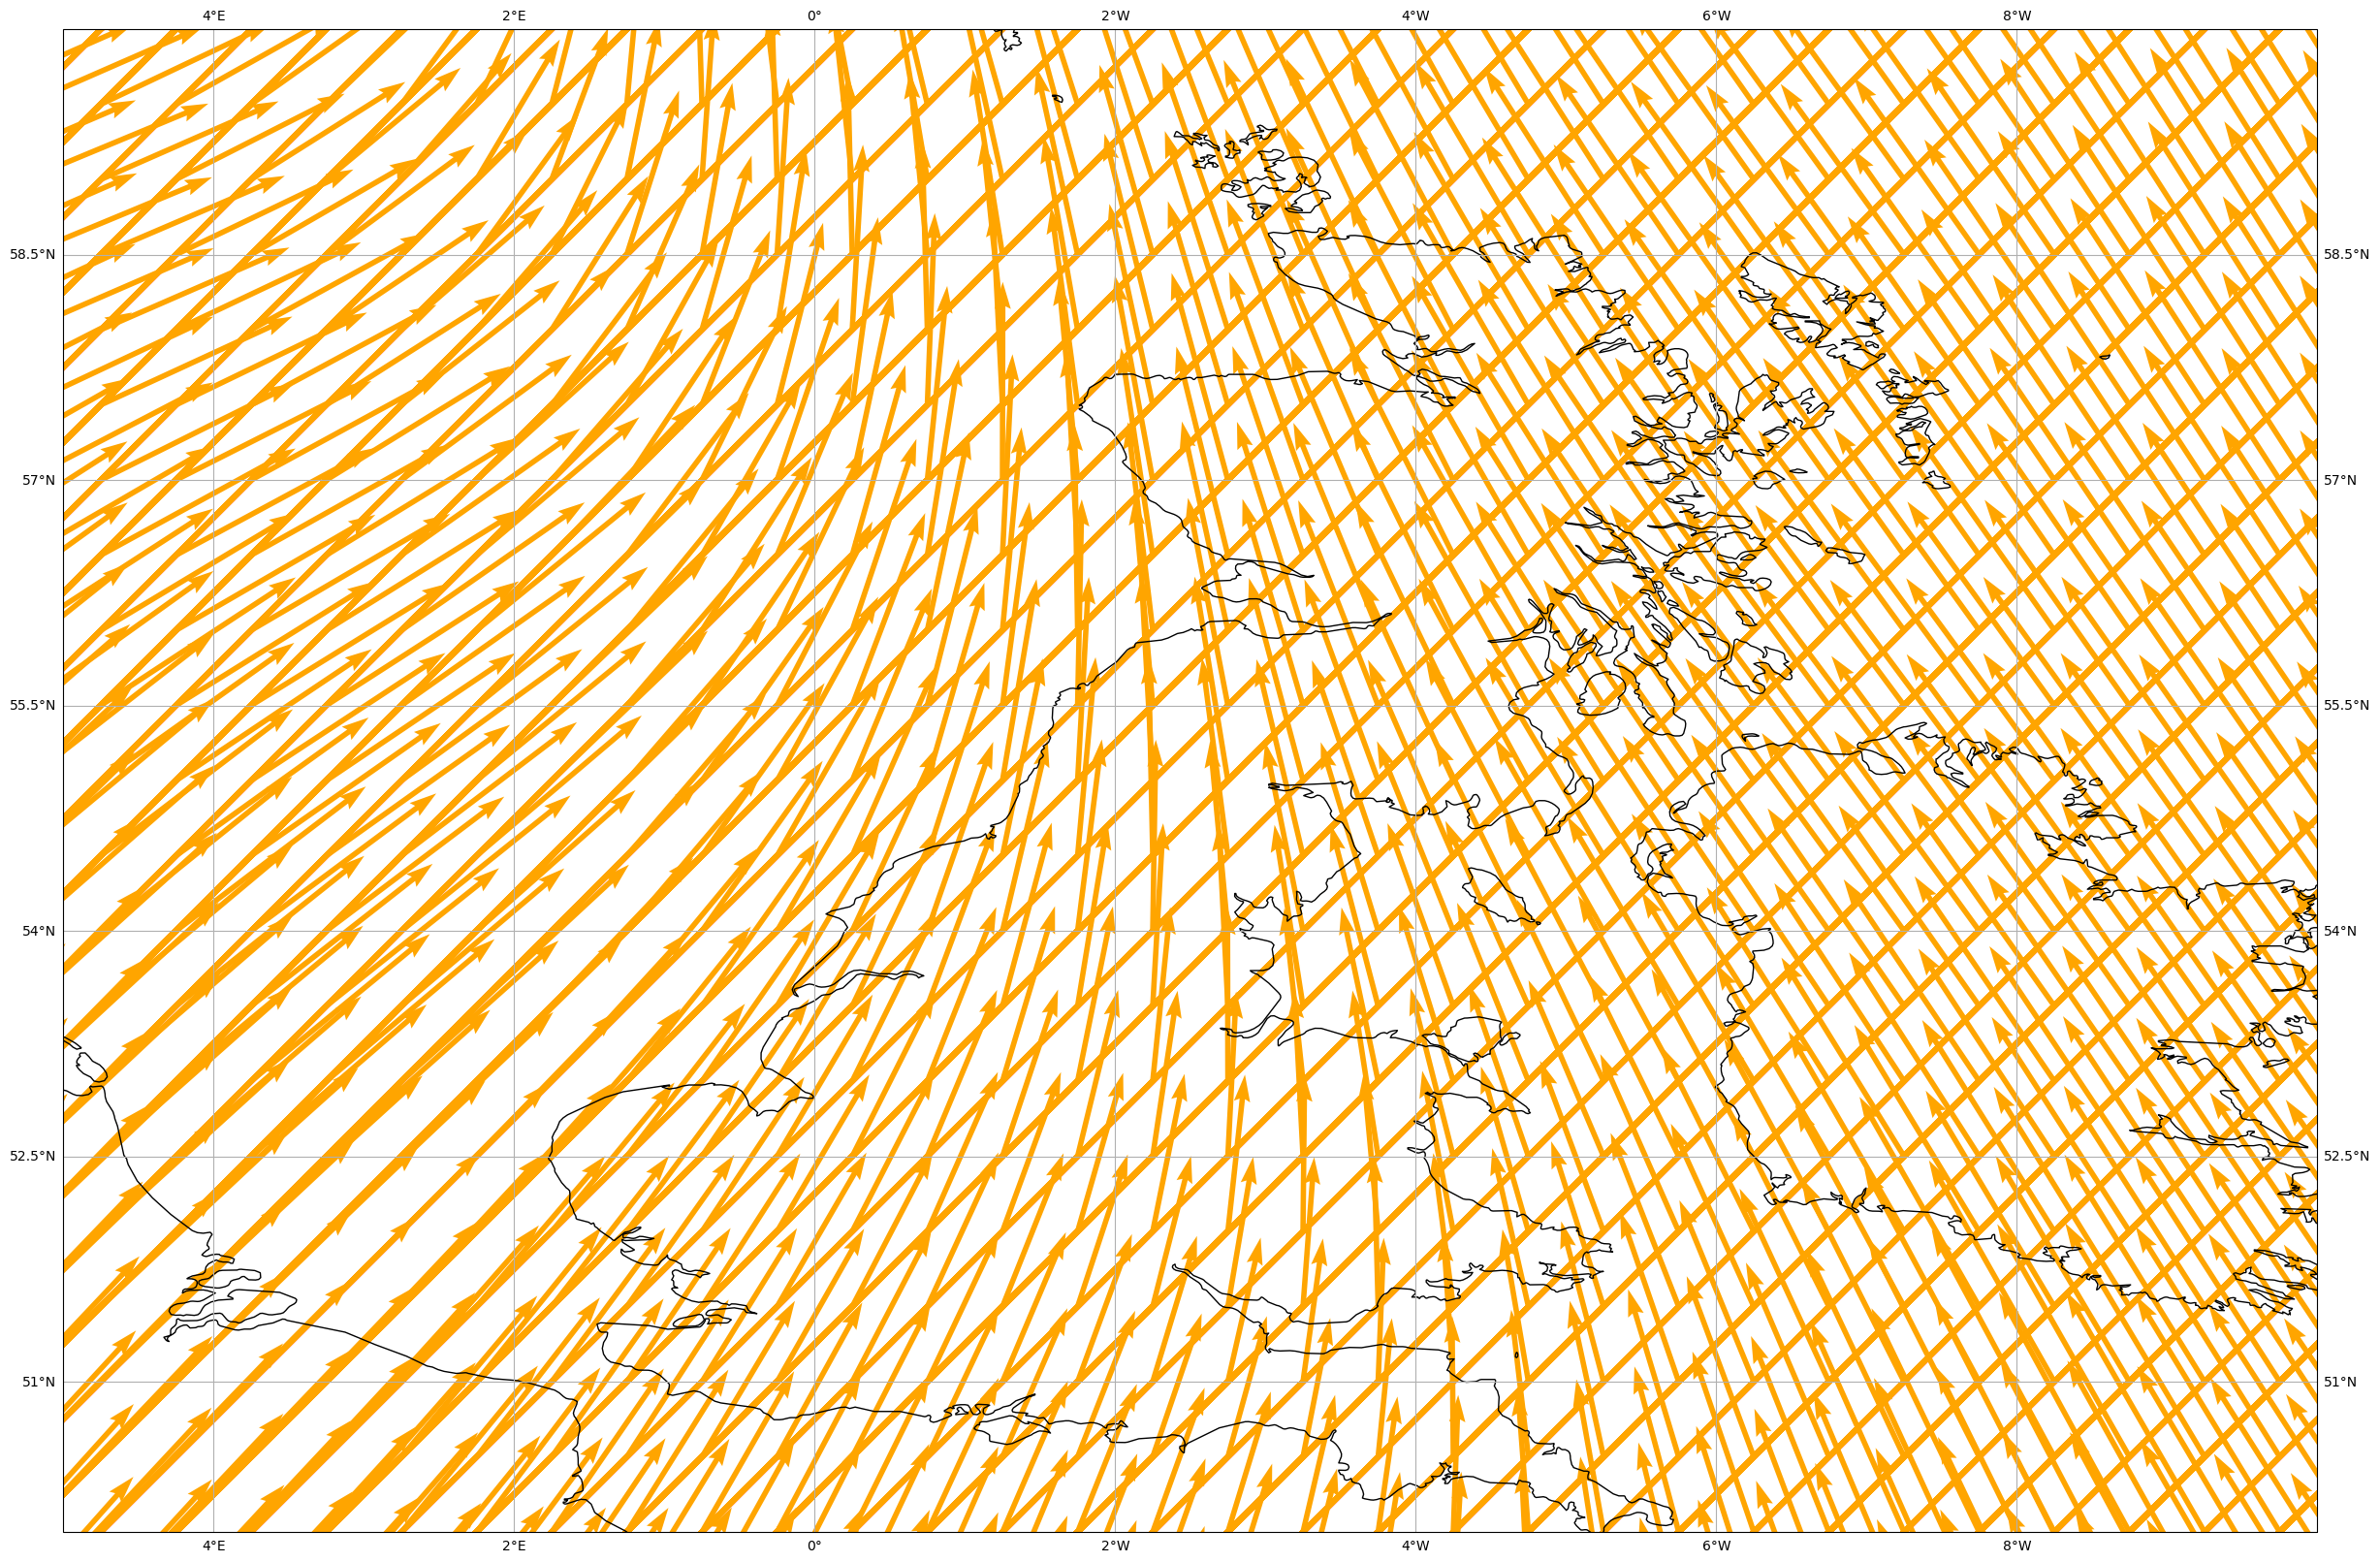

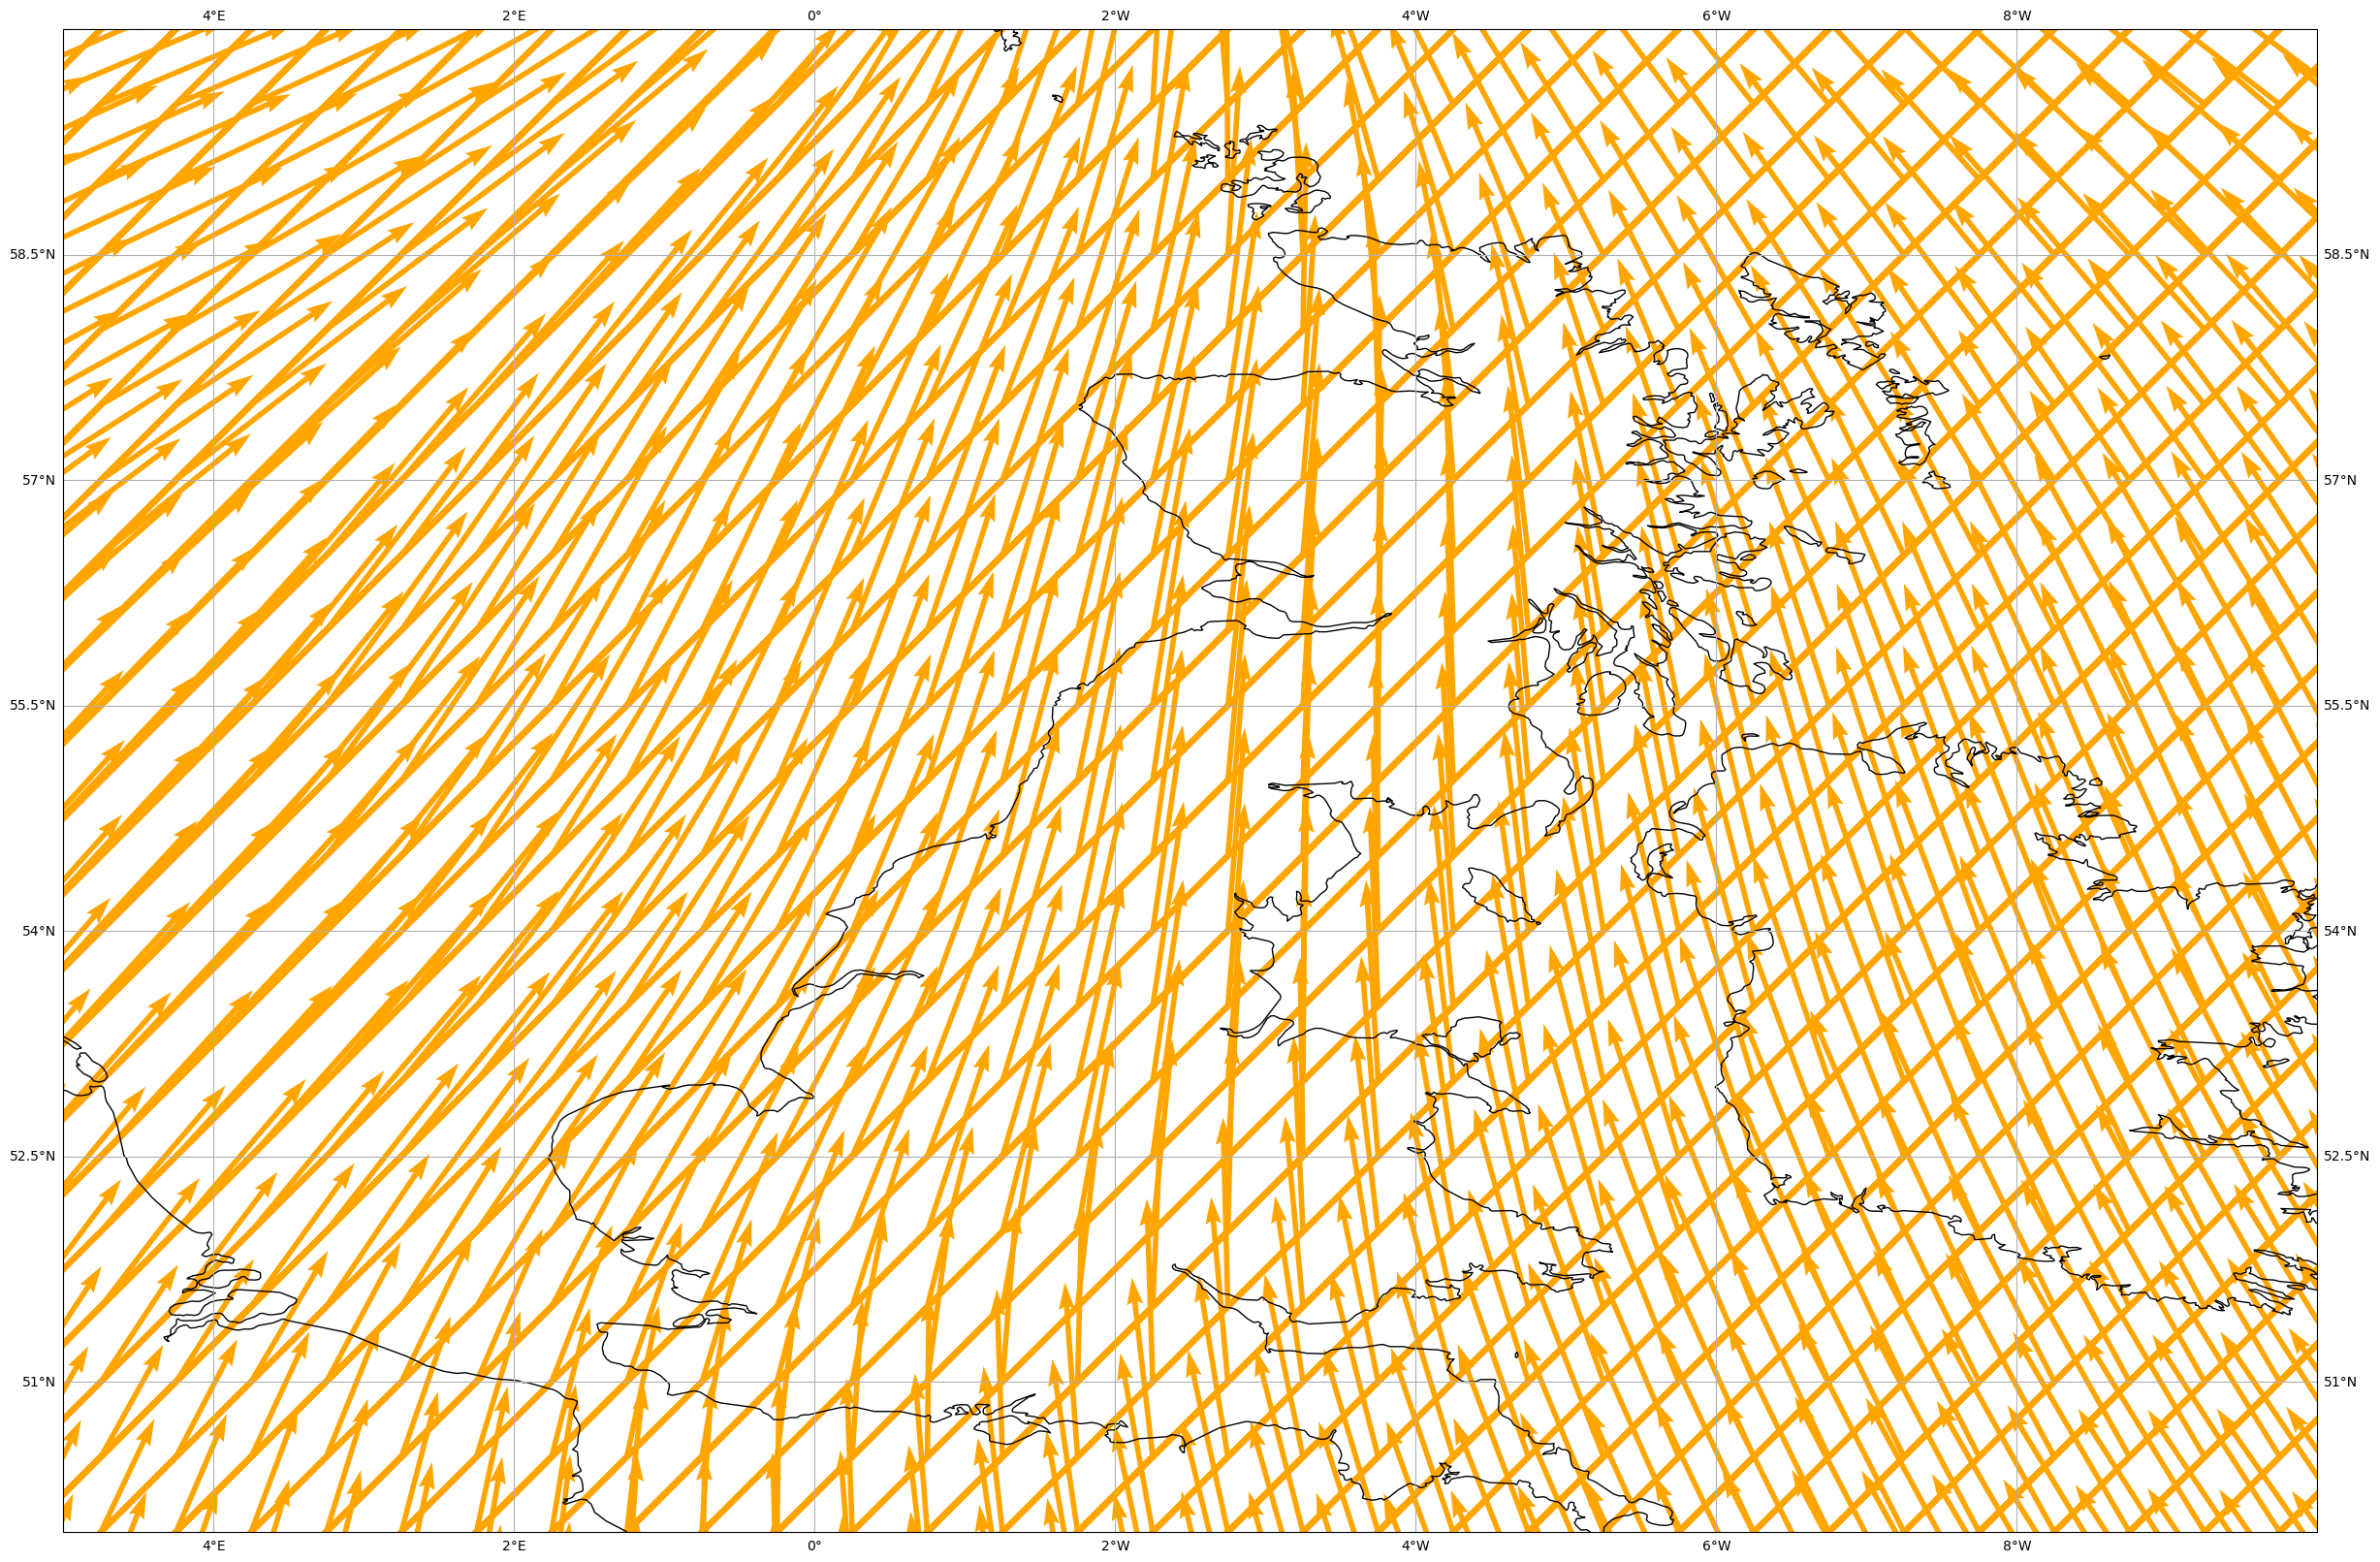

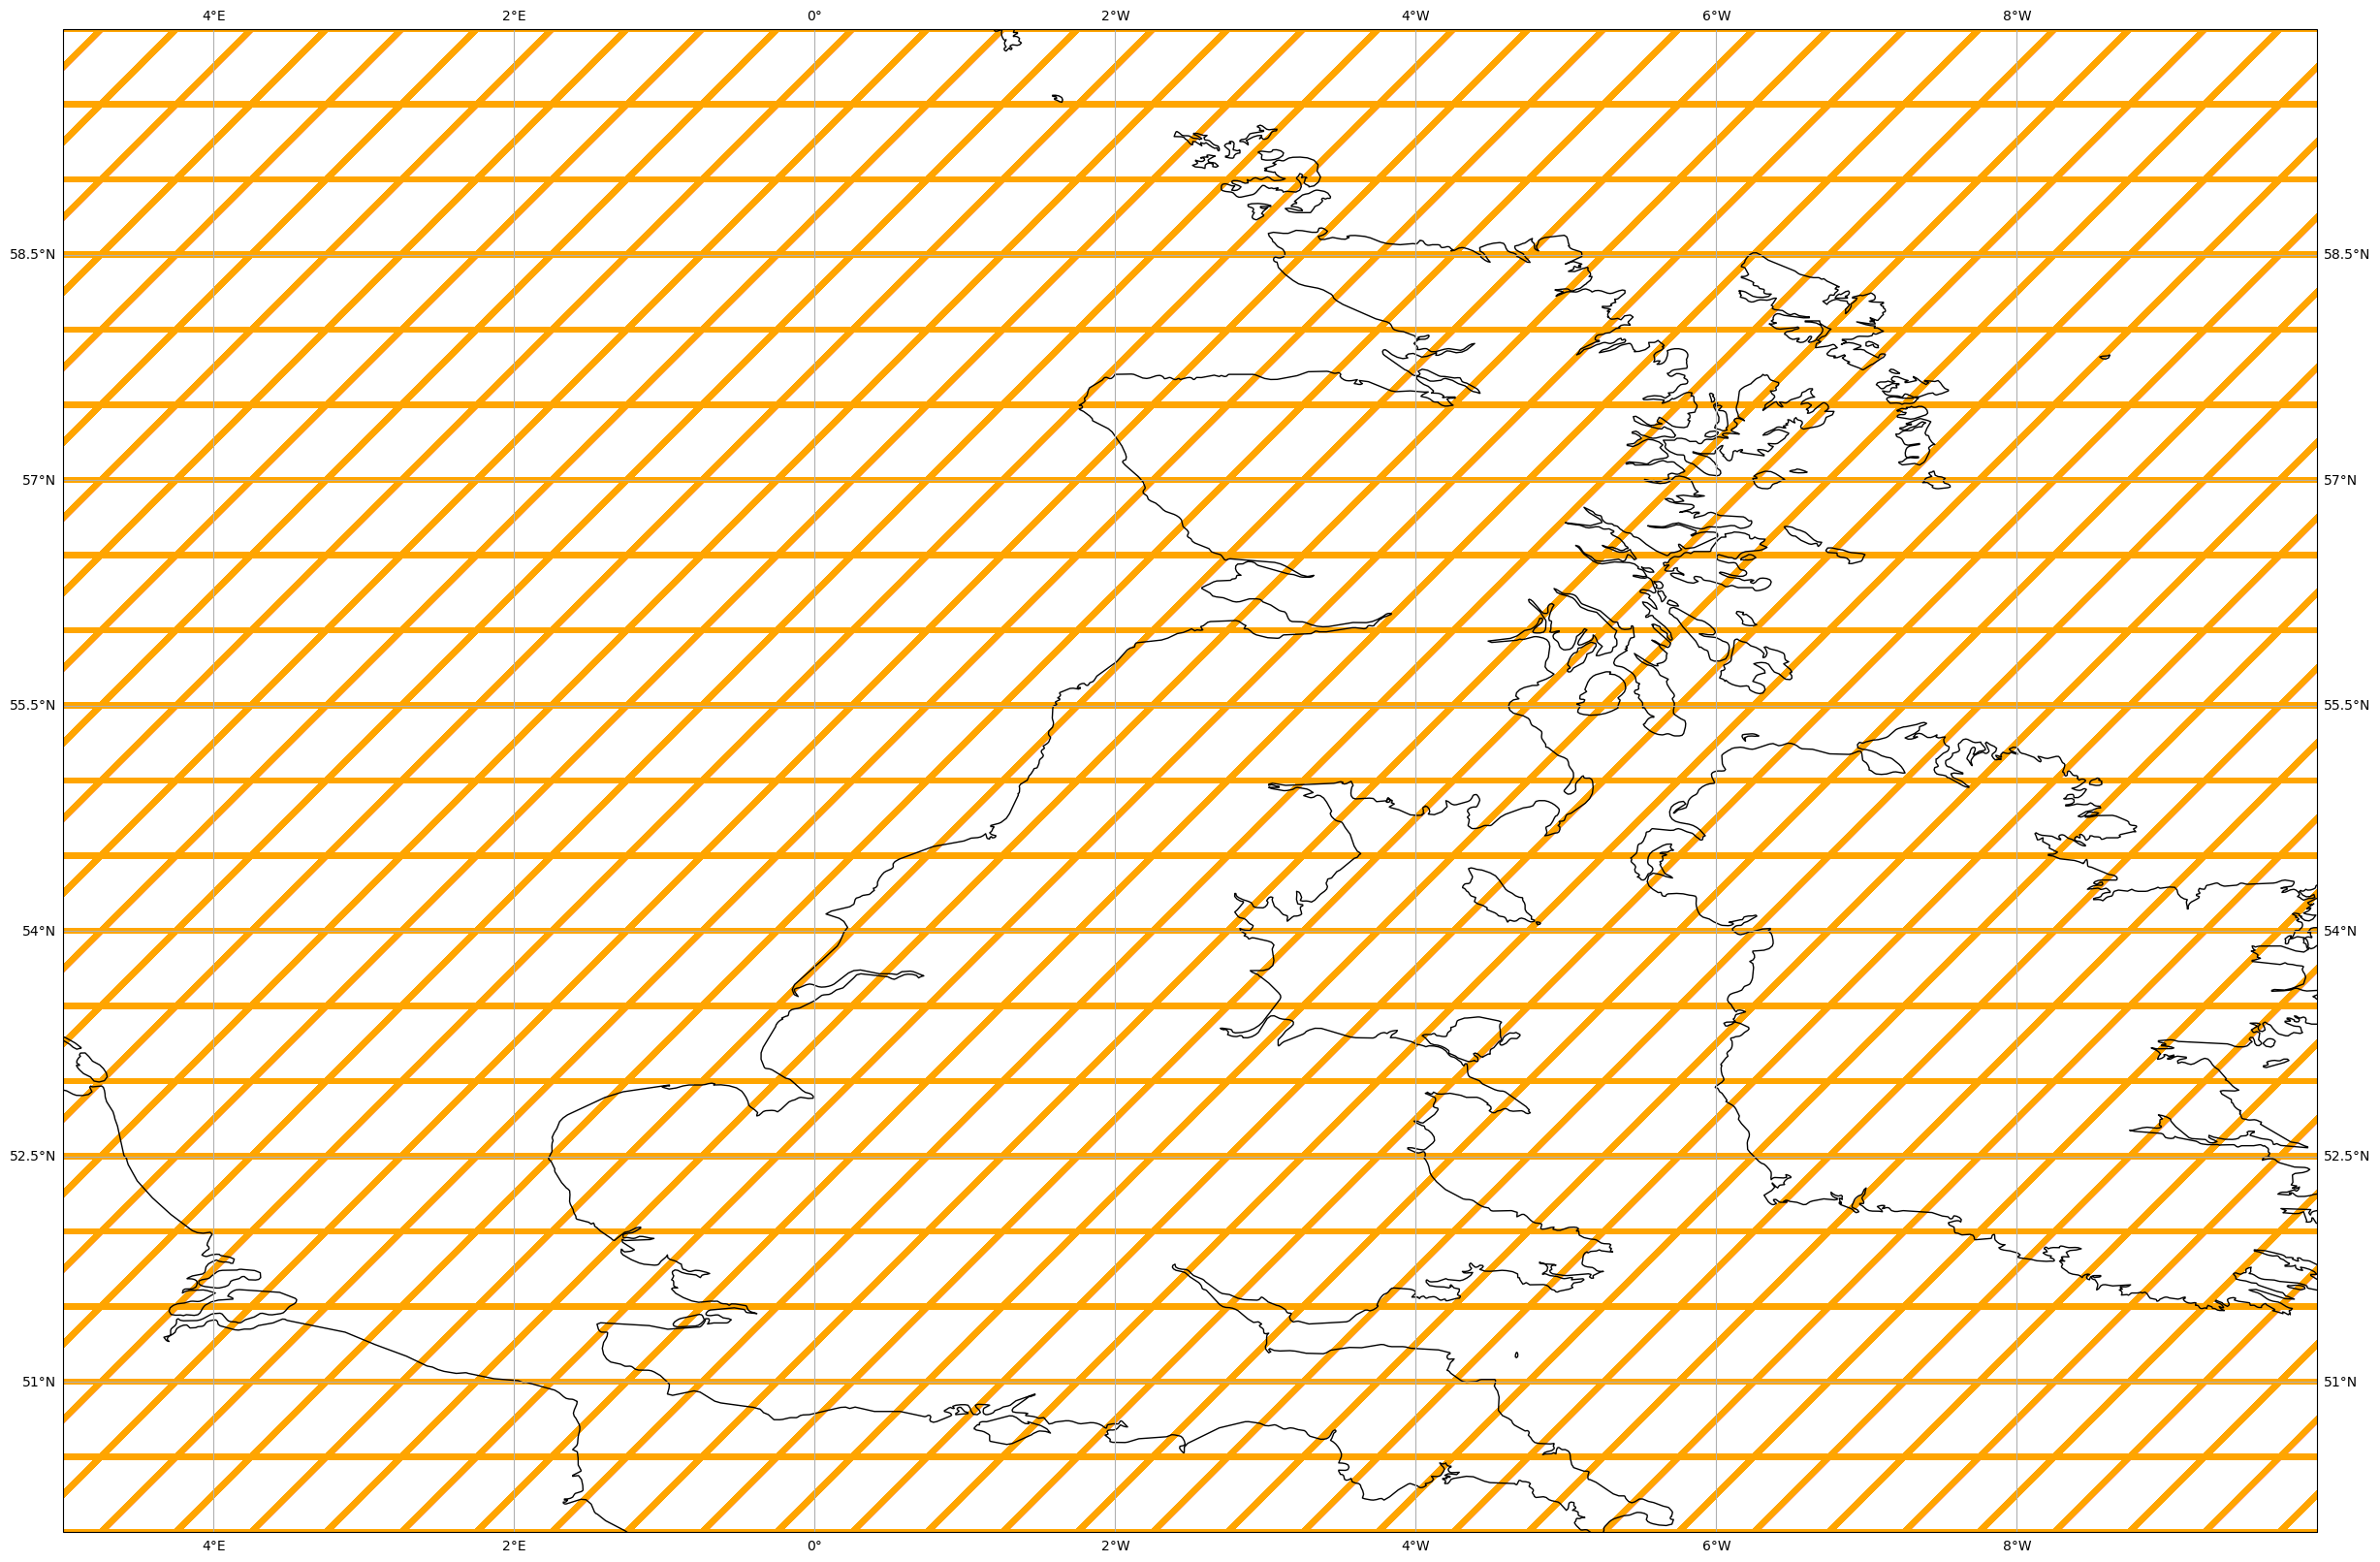

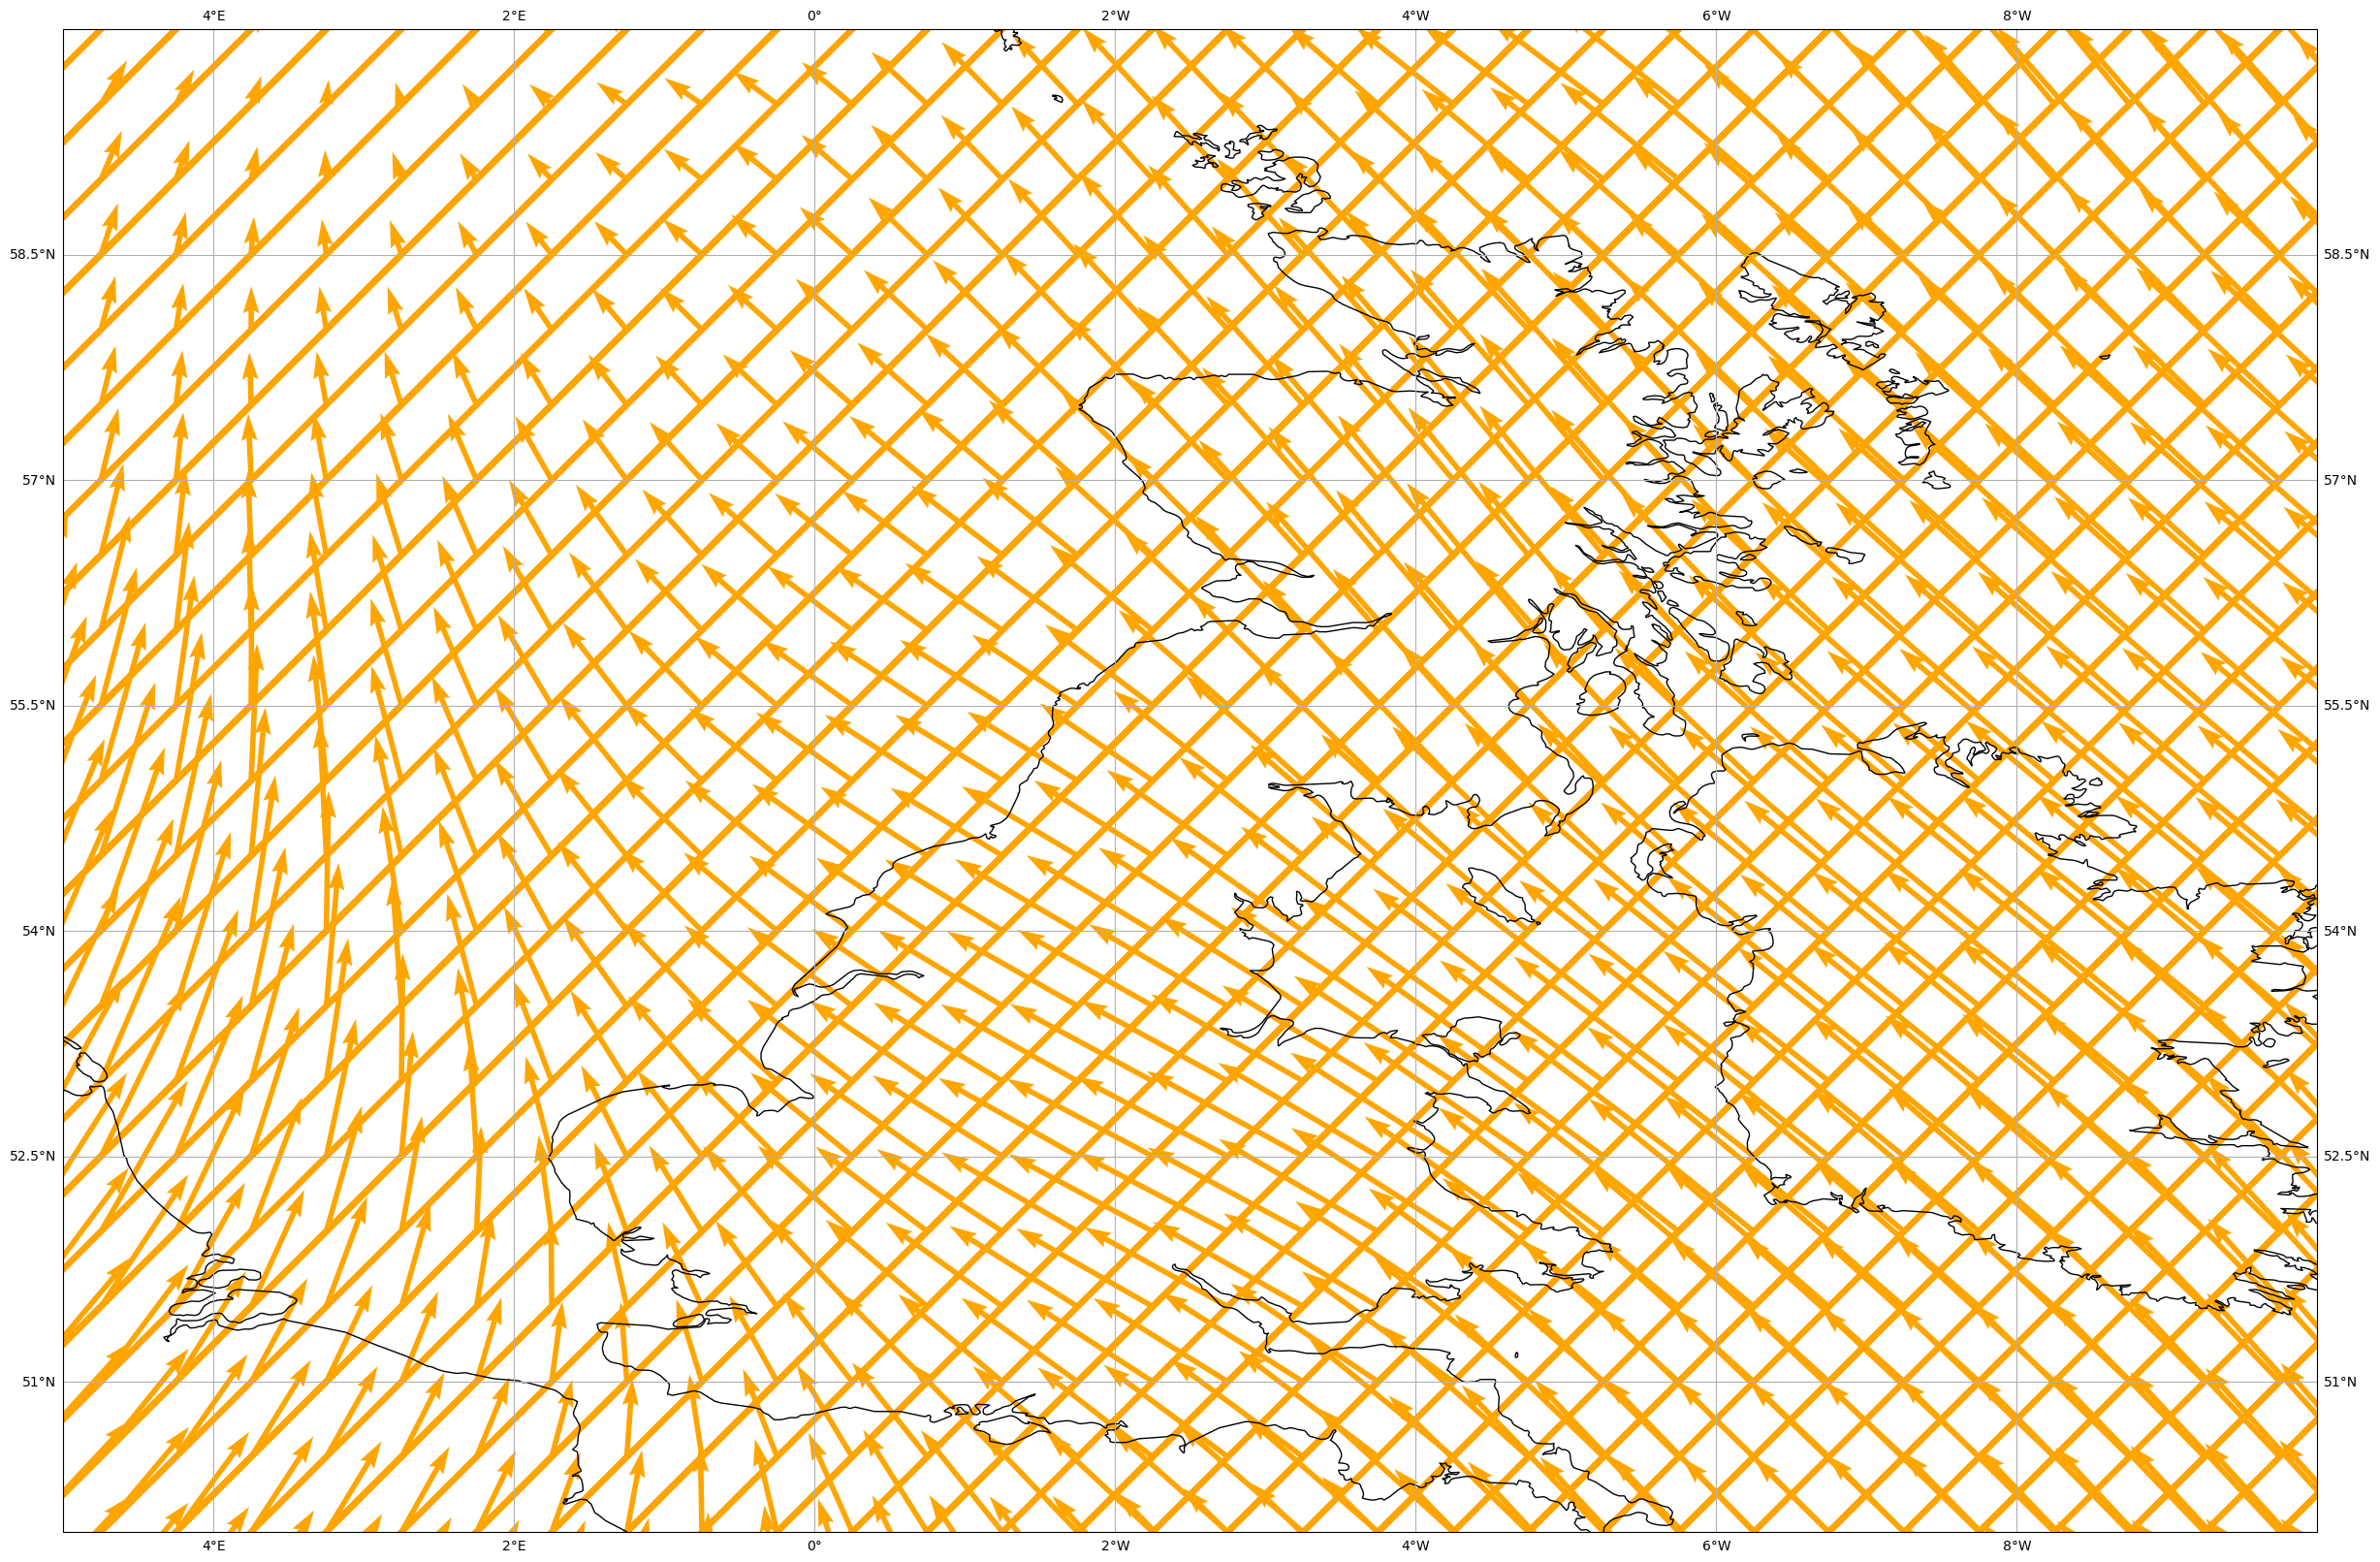

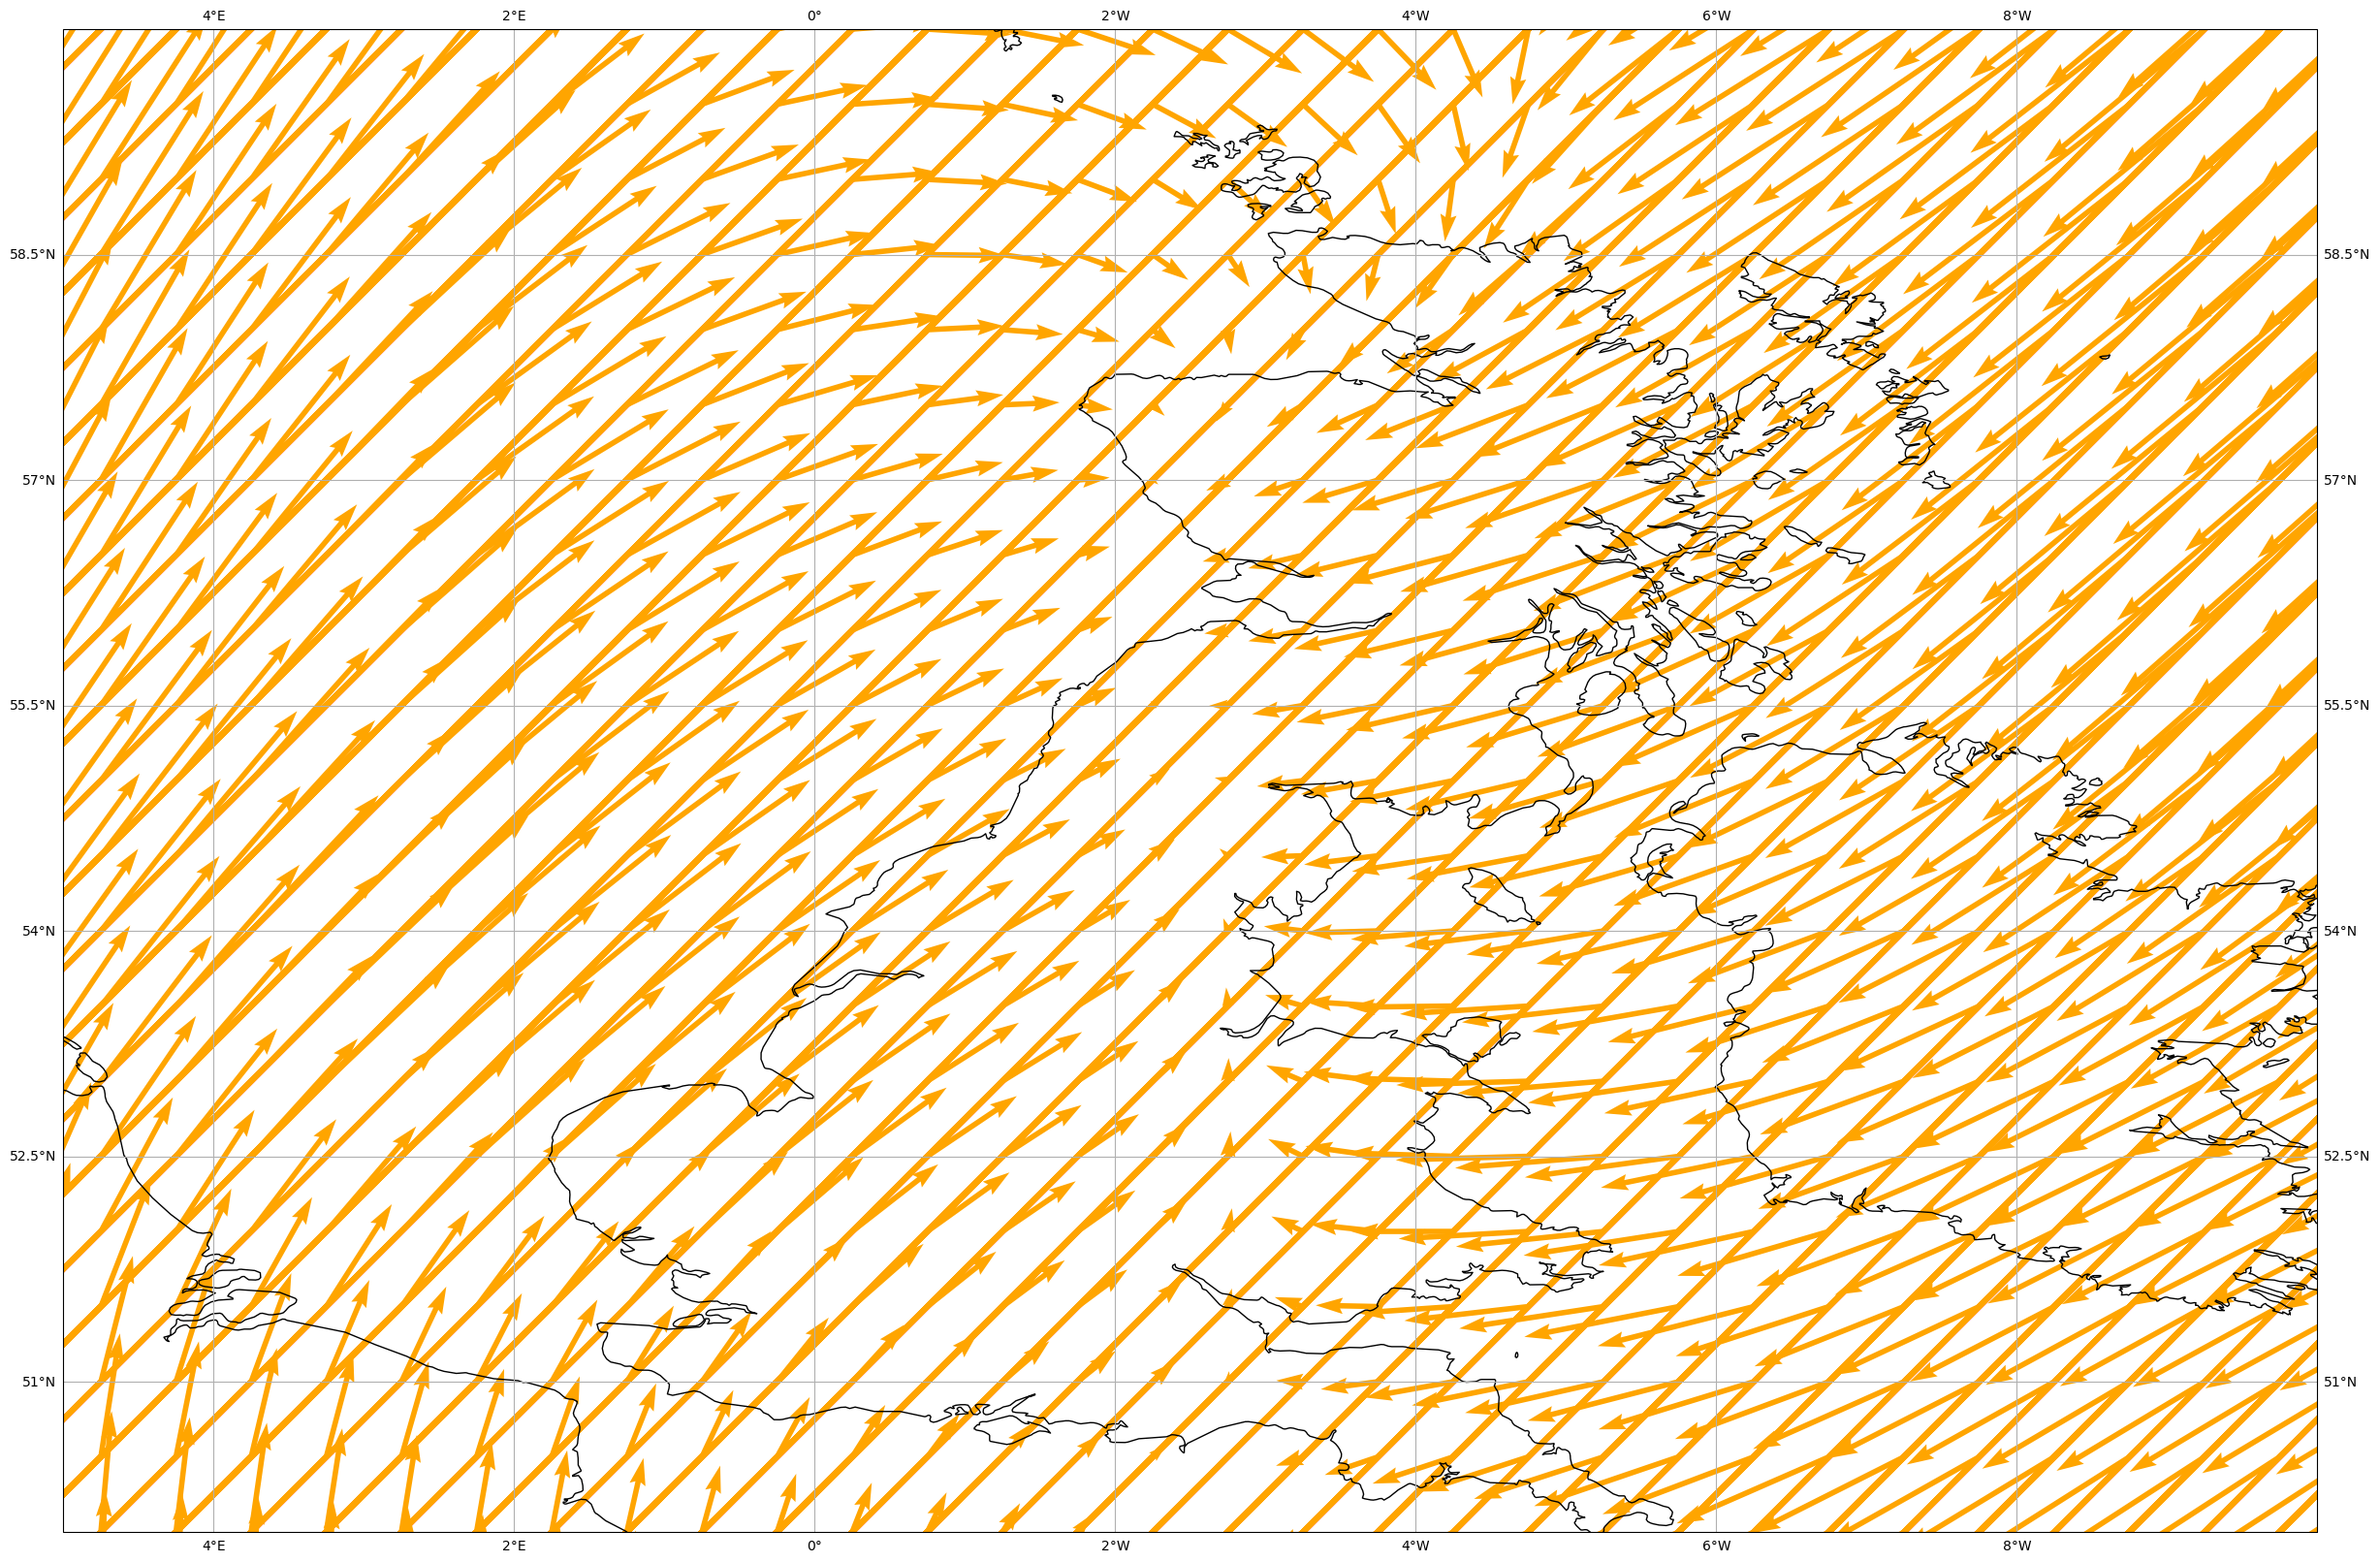

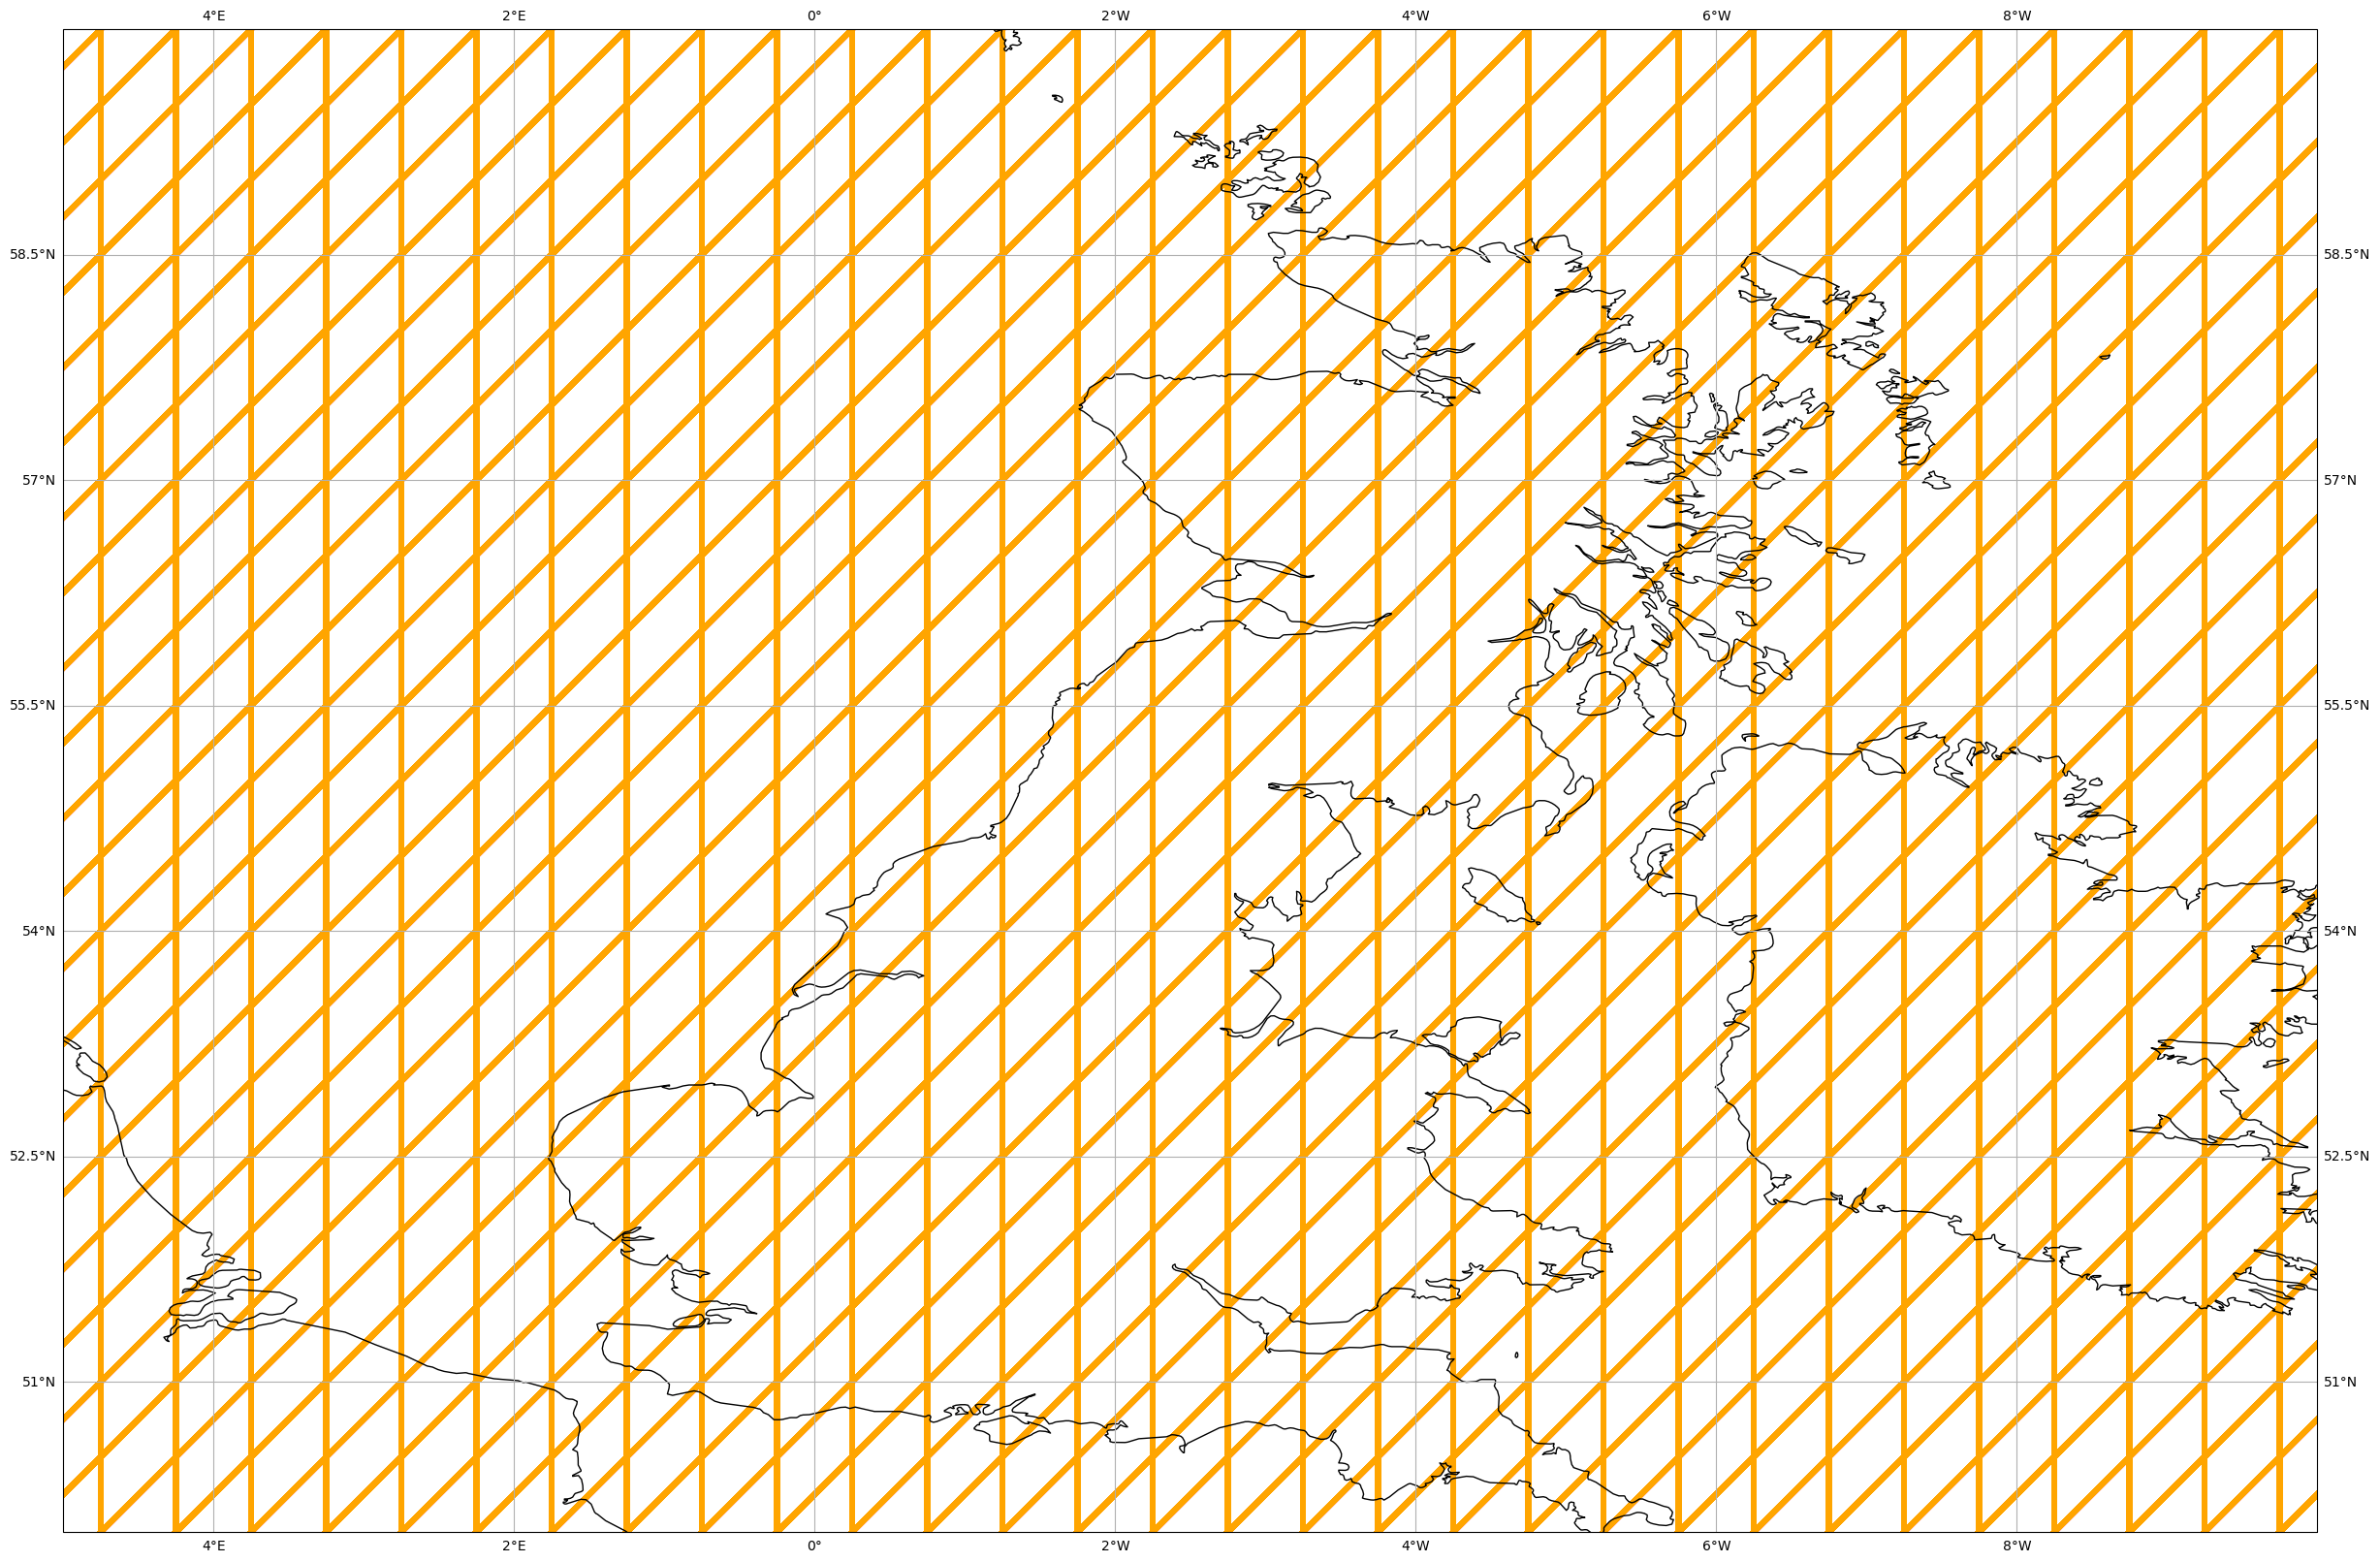

In [16]:
i=0
for d in list_dataframes:
# Create a figure and axis with a global map projection
    fig = plt.figure(figsize=(30, 30))
    ax = plt.axes(projection=ccrs.PlateCarree())
    # ax = plt.axes(projection=ccrs.Mercator())
    # Defining color
    # Plot the quiver plot with 'longitude' and 'latitude' as coordinates, 'u_speed' and 'v_speed' as vector components
    ax.quiver(d['longitude'], d['latitude'], d['u_speed'], d['v_speed'],scale=100,color='orange',alpha=1)
    # plt.quiver(d['longitude'], d['latitude'], d['u_speed'], d['v_speed'],)

    # Add coastlines and gridlines
    ax.coastlines()
    ax.gridlines(draw_labels=True)
    x_min = +5
    x_max = -10
    y_min = 50
    y_max = 60
    # # # Customize the plot as needed (e.g., add title, labels, etc.)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    # Show the plot
    # plt.show()
    plt.savefig(f'./Images/Fig{i}',bbox_inches ="tight")
    i+=1


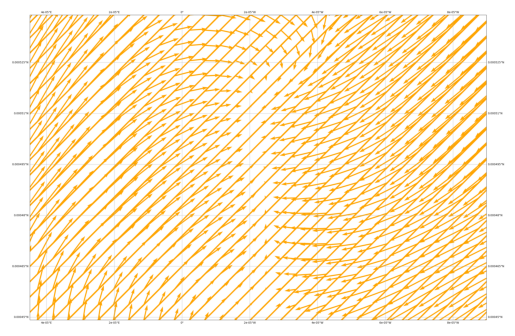

In [12]:
files = glob.glob("./Images/*.png")
image_array = []
for my_file in files:
    
    image = Image.open(my_file)
    image_array.append(image)

# print('image_arrays shape:', np.array(image_array).shape)


fig, ax = plt.subplots()
ax.axis('off')  # Hide the axis
ax.set_frame_on(False)
# Set the initial image
im = ax.imshow(image_array[0],animated=True)



In [13]:
def update(i):
    im.set_array(image_array[i])
    return im, 

In [14]:
animation_fig = FuncAnimation(fig, update, frames=len(image_array), interval=200, blit=True,repeat_delay=10,)

# Show the animation
plt.show()

animation_fig.save("./Images/animated_GMM.gif")

MovieWriter ffmpeg unavailable; using Pillow instead.
